In [3]:
library('tidyverse')
library(data.table)

In [4]:
cbind(read_csv("../data/output/df_predictions.csv") %>% select(-1),
read_csv("../data/output/preprocessed.csv") %>% select(-1)) -> data

New names:
• `` -> `...1`
Rows: 261333 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): ...1, prediction_0, prediction_1, prediction_2, prediction_3, predi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 261333 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): sequence_dna, mutated_wildtype_dna, mutated_amino_acids, rna_loops
dbl (5): ...1, fitness, p_value, standard_error, minimum_free_energy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
data %>% 
select(minimum_free_energy, fitness,aa=mutated_amino_acids,
prediction_0,prediction_1,prediction_2,prediction_3,prediction_4,SV=sequence_dna) %>%
filter (substr(aa,2,2) %in% c("D","E")) %>% 
filter (substr(aa,1,1) != "*") %>%
filter (substr(aa,3,3) != "*") -> data

In [6]:
data %>% head

,minimum_free_energy,fitness,aa,prediction_0,prediction_1,prediction_2,prediction_3,prediction_4,SV
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-37.4,0.00000000,ADL,-0.010922138,0.1171845,-0.007821668,-0.6533962,-0.0018942636,GCCGATCTC
2,-29.4,-0.20141800,KEK,0.007805680,1.5815070,0.016977657,-0.2702394,-0.0006344859,AAAGAAAAA
3,-32.8,0.08285479,KEN,-0.012122696,0.1445234,-0.007659617,-0.7078519,-0.0023702588,AAAGAAAAC
4,-33.6,-0.23339447,KEK,0.014255693,-1.4555469,-0.010177732,-0.1590905,0.0201418550,AAAGAAAAG
5,-31.0,-0.00290227,KEN,-0.012122696,0.1445234,-0.007659617,-0.7078519,-0.0023702588,AAAGAAAAT
6,-30.0,0.95541951,KET,0.006715408,1.4552578,0.030795187,0.4474232,-0.0104956120,AAAGAAACA


In [7]:
data %>% select(-aa,-SV) %>% cor

,minimum_free_energy,fitness,prediction_0,prediction_1,prediction_2,prediction_3,prediction_4
minimum_free_energy,1.00000000,0.059066883,0.13868907,0.020914658,0.02819158,0.07303109,0.018672636
fitness,0.05906688,1.000000000,-0.05753894,0.006785201,-0.02050125,-0.06892675,-0.003995752
prediction_0,0.13868907,-0.057538940,1.00000000,0.055688127,0.48969182,0.30962552,0.356411555
prediction_1,0.02091466,0.006785201,0.05568813,1.000000000,0.65427874,-0.11061822,-0.552832267
prediction_2,0.02819158,-0.020501249,0.48969182,0.654278743,1.00000000,0.19137111,-0.015770030
prediction_3,0.07303109,-0.068926747,0.30962552,-0.110618217,0.19137111,1.00000000,-0.205096835
prediction_4,0.01867264,-0.003995752,0.35641156,-0.552832267,-0.01577003,-0.20509683,1.000000000


Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `cor = cor(minimum_free_energy, fitness)`.
ℹ In group 359: `aa = "KEW"`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”


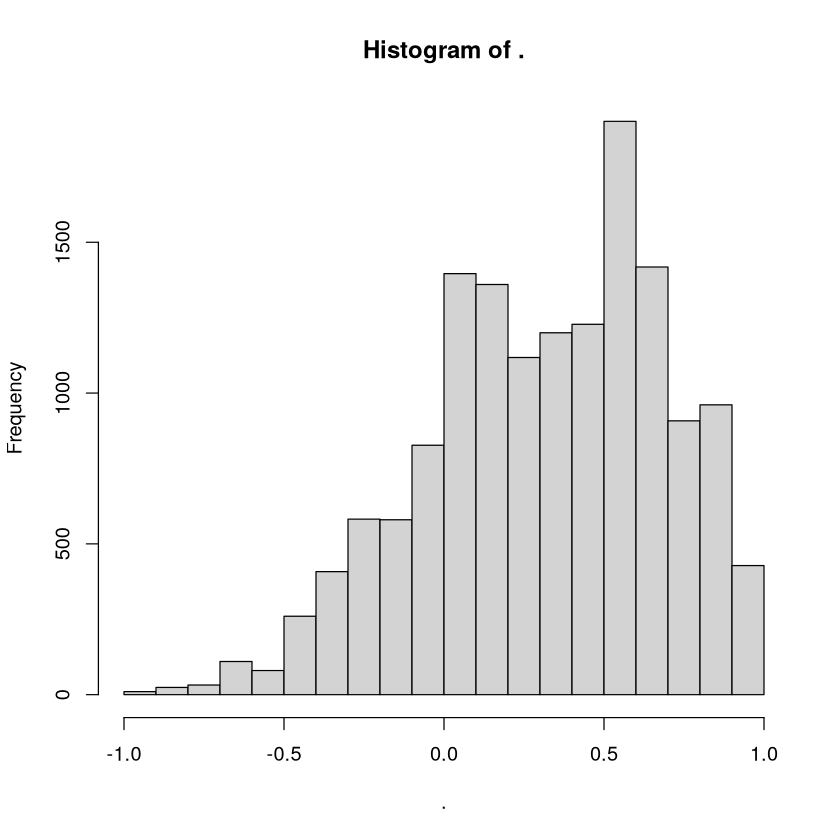

In [8]:
data %>% group_by(aa) %>% 
mutate(
    cor = cor(minimum_free_energy, fitness)) %>% 
pull(cor) %>% hist

In [9]:
calculate_dist= function (df) {
    mat1 = df %>% select(contains("prediction")) %>% as.matrix()
    mat2 = df %>% select(contains("fitness")) %>% as.matrix()
    res = cor.test(
        dist(mat1, method = "euclidean") %>% c,
        dist(mat2, method = "euclidean") %>% c, method="spearman")
    return(tibble(est = res$estimate,pval = res$p.value))
}


In [10]:
calculate_mean_dist= function (df) {
    mat1 = df %>% select(contains("prediction")) %>%
      as.matrix()
    return (mean(mat1))}


In [11]:
data %>% head

,minimum_free_energy,fitness,aa,prediction_0,prediction_1,prediction_2,prediction_3,prediction_4,SV
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-37.4,0.00000000,ADL,-0.010922138,0.1171845,-0.007821668,-0.6533962,-0.0018942636,GCCGATCTC
2,-29.4,-0.20141800,KEK,0.007805680,1.5815070,0.016977657,-0.2702394,-0.0006344859,AAAGAAAAA
3,-32.8,0.08285479,KEN,-0.012122696,0.1445234,-0.007659617,-0.7078519,-0.0023702588,AAAGAAAAC
4,-33.6,-0.23339447,KEK,0.014255693,-1.4555469,-0.010177732,-0.1590905,0.0201418550,AAAGAAAAG
5,-31.0,-0.00290227,KEN,-0.012122696,0.1445234,-0.007659617,-0.7078519,-0.0023702588,AAAGAAAAT
6,-30.0,0.95541951,KET,0.006715408,1.4552578,0.030795187,0.4474232,-0.0104956120,AAAGAAACA


In [12]:
data %>% group_by(aa) %>% 
summarise(
    mean_dist = calculate_mean_dist(cur_data()),
    n = n(),
    mean = mean(fitness),
    sd = sd(fitness),
    mfe = sd(minimum_free_energy),
    fitness_diff = dist(fitness) %>% max)    -> data_sum


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `mean_dist = calculate_mean_dist(cur_data())`.
ℹ In group 1: `aa = "ADA"`.
Caused by warning:
! `cur_data()` was deprecated in dplyr 1.1.0.
ℹ Please use `pick()` instead.”


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


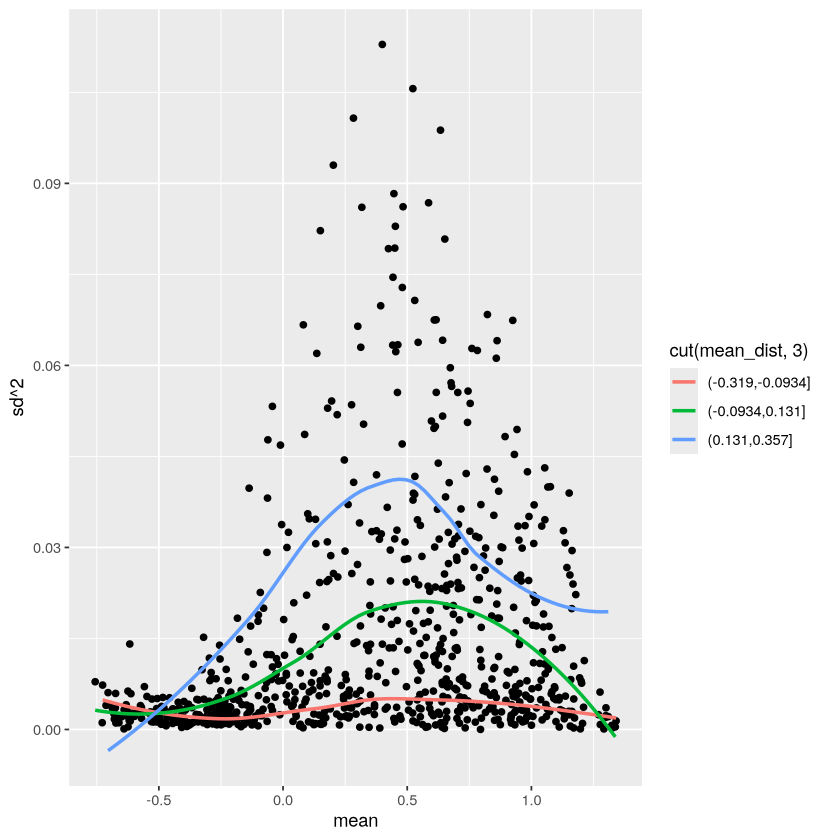

In [13]:
ggplot(data_sum, aes(x= mean,y=sd^2))+
geom_point()+
geom_smooth(aes(color= cut(mean_dist,3),group=cut(mean_dist,3)),se=F)


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


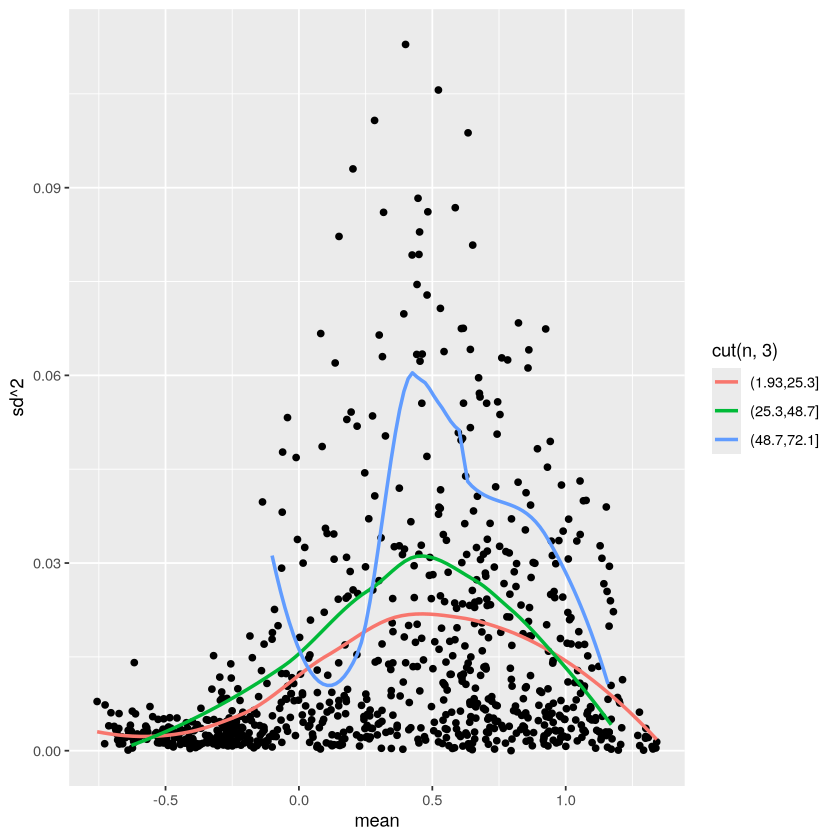

In [67]:
ggplot(data_sum, aes(x= mean,y=sd^2))+
geom_point()+
geom_smooth(aes(color= cut(n,3),group=cut(n,3)),se=F)


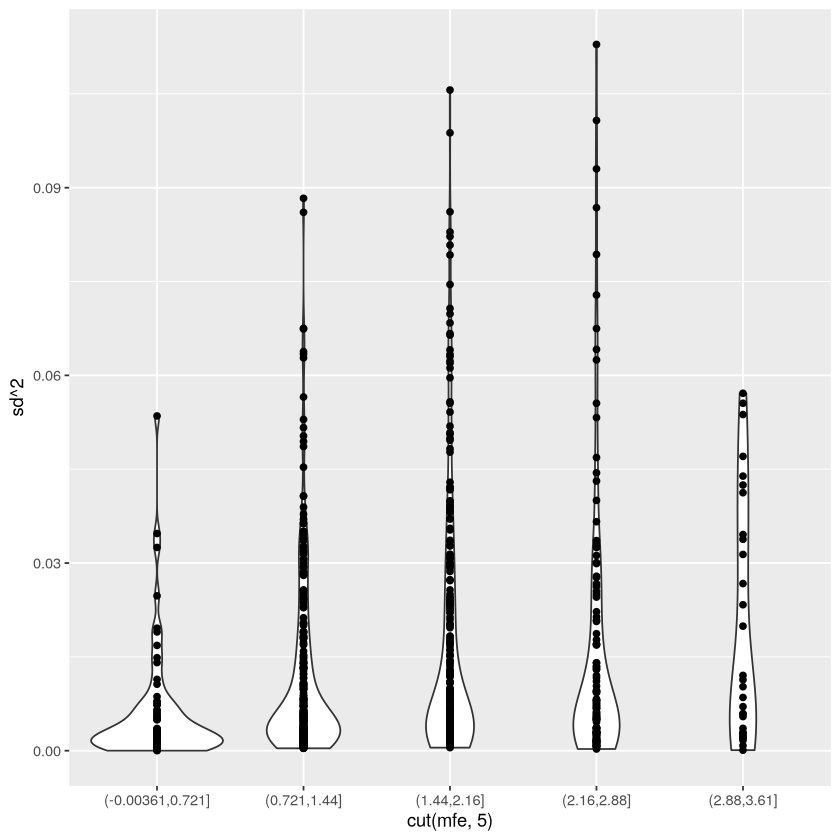

In [60]:
ggplot(data_sum, aes(x= cut(mfe,5),y=sd^2))+
geom_violin()+
geom_point()

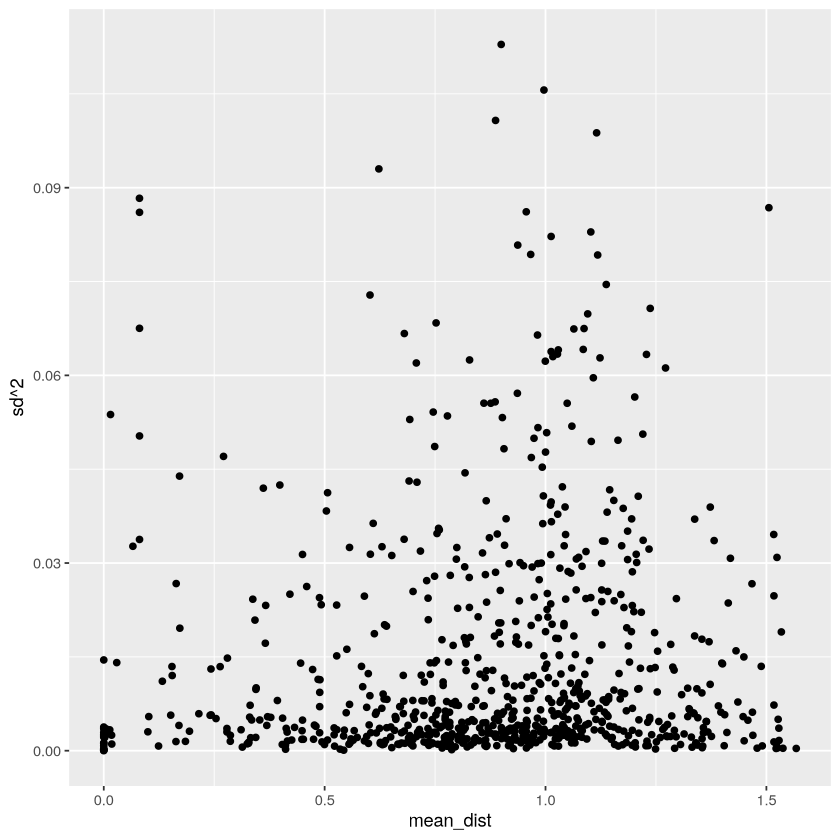

In [40]:
ggplot(data_sum, aes(x= mean_dist,y=sd^2))+
geom_point()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


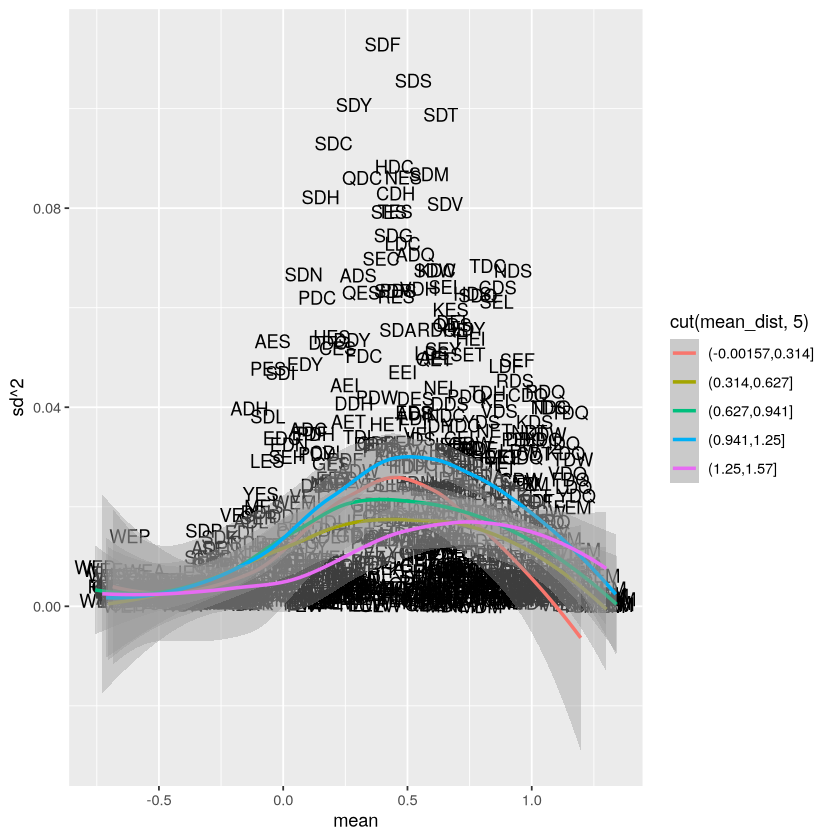

In [41]:
ggplot(data_sum, aes(x= mean,y=sd^2))+
geom_text(aes(label=aa))+geom_smooth(aes(color= cut(mean_dist,5),group=cut(mean_dist,5)))


In [24]:
data %>% filter(aa=="LDL") %>%
    select(contains(c("prediction","SV"))) %>%
    column_to_rownames("SV") %>%
    dist %>% as.matrix %>% 
   { .[lower.tri(.)] <- NA; . } %>%
    as.data.frame() %>% 
    rownames_to_column(var = "i") %>%
    reshape2::melt(id.vars = "i", variable.name = "j",value.name = "distance") %>%
    filter(i!=j) %>%
    drop_na(distance )
   



i,j,distance
<chr>,<fct>,<dbl>
CTAGACCTA,CTAGACCTC,1.49915697
CTAGACCTA,CTAGACCTG,0.13455716
CTAGACCTC,CTAGACCTG,1.54177894
CTAGACCTA,CTAGACCTT,0.00000000
CTAGACCTC,CTAGACCTT,1.49915697
CTAGACCTG,CTAGACCTT,0.13455716
CTAGACCTA,CTAGACTTA,0.06574110
CTAGACCTC,CTAGACTTA,1.52770938
CTAGACCTG,CTAGACTTA,0.07024526


In [20]:
72*(72-1)/2

[1] 2556

In [35]:
calculte_pairwise_diff= function(df){
    if (n_distinct(df$aa)>1) stop("did you forget to group by aa")

    AA = df %>% pull(aa) %>% unique 

    res = df %>%
    select(contains(c("prediction","SV"))) %>%
    column_to_rownames("SV") %>%
    dist %>% as.matrix %>% 
   { .[lower.tri(.)] <- NA; . } %>%
    as.data.frame() %>% 
    rownames_to_column(var = "i") %>%
    reshape2::melt(id.vars = "i", variable.name = "j",value.name = "distance") %>%
    filter(i!=j) %>%
    drop_na(distance)

 
    res2 = df %>%
    select(contains(c("fitness","SV"))) %>%
    column_to_rownames("SV") %>%
    dist(p=1) %>% as.matrix %>% 
   { .[lower.tri(.)] <- NA; . } %>%
    as.data.frame() %>% 
    rownames_to_column(var = "i") %>%
    reshape2::melt(id.vars = "i", variable.name = "j",value.name = "fitness_diff") %>%
    filter(i!=j) %>%
    drop_na(fitness_diff)

    

    res %>% left_join(.,res2,by=c("i","j"))
}

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


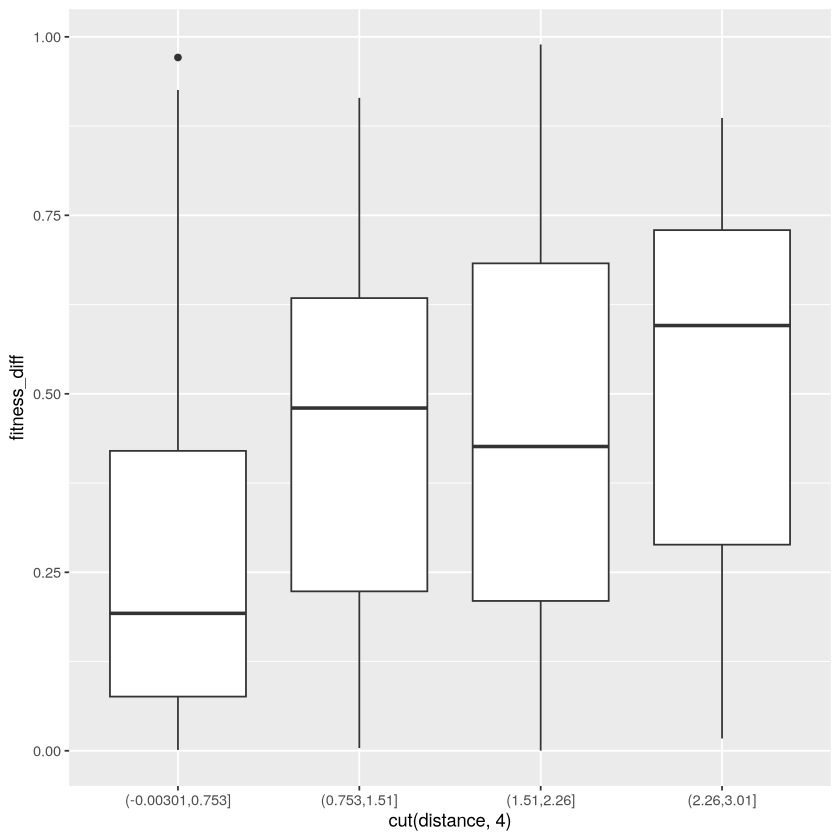

In [46]:
data %>% filter(aa=="SDS") %>% calculte_pairwise_diff %>%

ggplot(aes(x=cut(distance,4),y=fitness_diff)) + geom_boxplot() + geom_smooth()

In [51]:
data %>% filter(aa=="") %>% calculte_pairwise_diff %>% {cor(.$distance,.$fitness_diff)}

[1] 0.1715829

In [ ]:
data %>% group_by(aa) %>% 
summarise(
    calculate_mean_dist(cur_data()),
    n = n(),

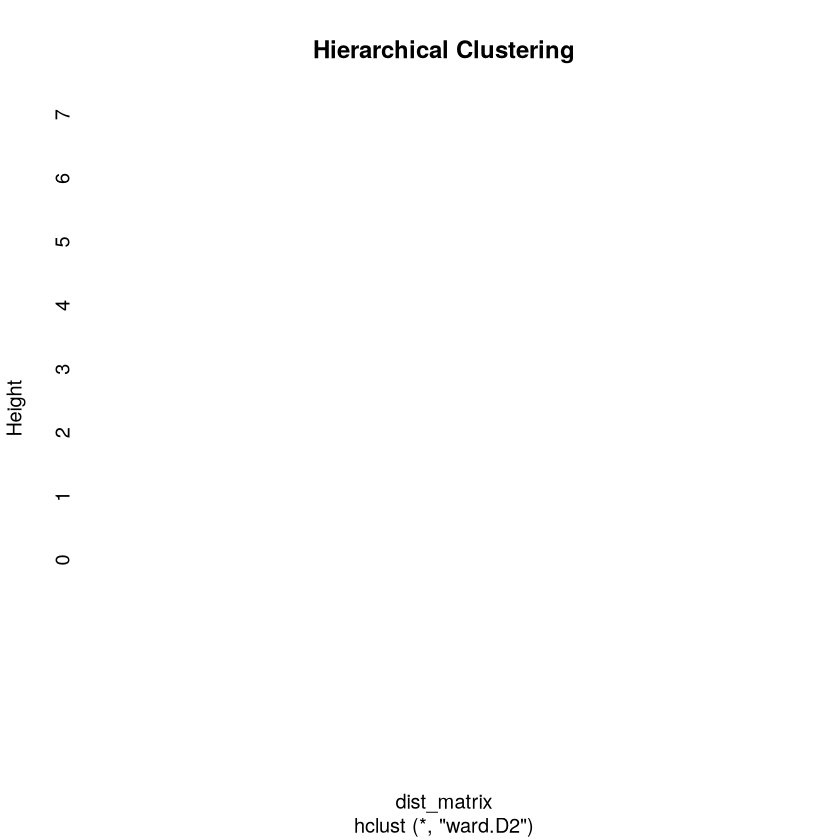

In [82]:
data %>% filter(aa=="TDS") %>% 
mutate(name = sprintf("%s_%.02f",SV,fitness)) %>% 
column_to_rownames("name") %>%
select(contains("prediction")) %>% 
dist(.) -> dist_matrix

# Perform hierarchical clustering
hc <- hclust(dist_matrix, method = "ward.D2")

# Plot dendrogram
plot(hc, main = "Hierarchical Clustering",col="white",cex=0.5)

# Cut tree into 3 clusters
clusters <- cutree(hc, k = 3)

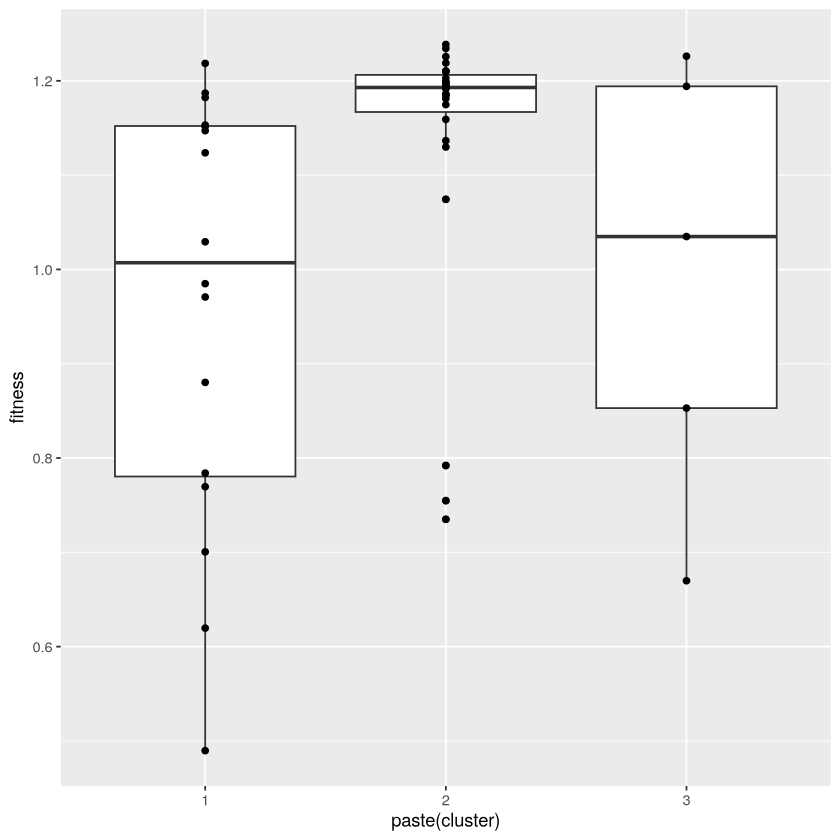

In [84]:
clusters %>% 
    as.data.frame() %>% 
    rownames_to_column("name") %>% 
    rename(cluster=".") %>% 
    left_join(data %>% filter(aa=="TDS") %>% mutate(name = sprintf("%s_%.02f",SV,fitness))  ,by="name") %>% 
    ggplot(aes(x=paste(cluster),y=fitness))+geom_boxplot()+geom_point()

In [57]:
dev.new() 
plot(hc)